In [1]:
# basic library import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading our two required dataset
train = pd.read_csv('/content/sample_data/Home_train.csv')
test = pd.read_csv('/content/sample_data/Home_test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [11]:
### Data Preprocessing(Train set)
# dropping colmuns where number of null values is greater than 500
null_values = train.loc[:,train.isnull().sum()>500]
train.drop(null_values,axis=1, inplace = True)

In [12]:
### Let's remove features with less importance. Less important features was selected by correlation score.
# list of less important features
less_important = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
 '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure','BsmtFinType1',
 'Heating', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish','SaleType']

# dropping less important columns
train.drop(less_important, axis = 1, inplace = True)

In [13]:
## Let's check for null values. To view the full dataset first we need to set display.max_rows
pd.set_option('display.max_rows', None)
pd.DataFrame(train.isna().sum())

,0
LotFrontage,259
LotArea,0
Neighborhood,0
Condition1,0
HouseStyle,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0
RoofStyle,0
RoofMatl,0


In [14]:
# filling null values
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['MasVnrArea'].fillna(0 , inplace = True)
train['BsmtCond'].fillna('NA' , inplace = True)
train['BsmtFinType2'].fillna('NA' , inplace = True)
train['Electrical'].fillna('SBrkr' , inplace = True)
train['GarageYrBlt'].fillna(0 , inplace = True)
train['GarageQual'].fillna('NA' , inplace = True)
train['GarageCond'].fillna('NA' , inplace = True)

In [15]:
train.isna().sum()

LotFrontage      0
LotArea          0
Neighborhood     0
Condition1       0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterCond        0
Foundation       0
BsmtCond         0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
ScreenPorch      0
SaleCondition    0
SalePrice        0
dtype: int64

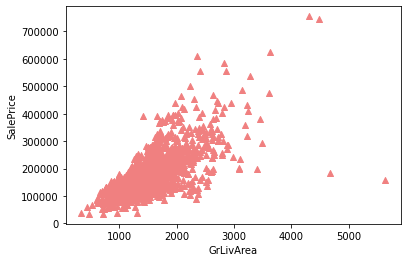

In [16]:
### EDA
plt.scatter(train.GrLivArea, train.SalePrice, c = "lightcoral", marker ="^")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [17]:
### There are some odd values that saying Ground living area is bigger than 4000. We will treat them as outliers.
#removing outliers
train = train[train.GrLivArea < 4000]

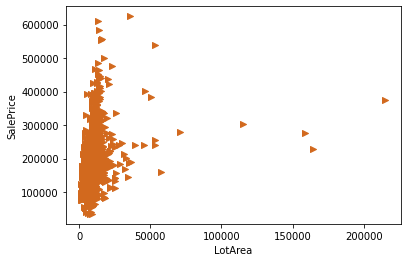

In [18]:
### Let's plot another scatter plot visualizing LotArea and SalePrice
plt.scatter(train.LotArea, train.SalePrice, c = "chocolate", marker =">")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

In [19]:
## We will consider LotArea greater than 150000 as outliers.
#removing outliers
train = train[train.LotArea < 150000]

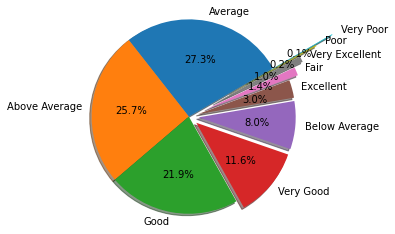

In [20]:
### OverallQual refers overall quality of the house. This is a important feature. SalePrice largly depends on it. Because if the house quality is Very Excellent than it is more likely to be sold with high price. Let's analyse this column.
labels = 'Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor' 
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.5, 0.7)

fig1, ax1 = plt.subplots()
ax1.pie(train['OverallQual'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

27.3% houses of the train dataset has Average quality. And 0.1% houses are Very Poor in quality.

Let's see the SalePrice variation w.r.t OverallQual

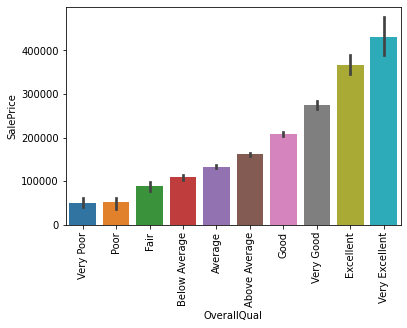

In [21]:
fig = sns.barplot(x = 'OverallQual',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent'], rotation=90);

Foundation is another important feature. It represent how strong a bulding can be. Buildings life depends on it. So, this column worth analysing.

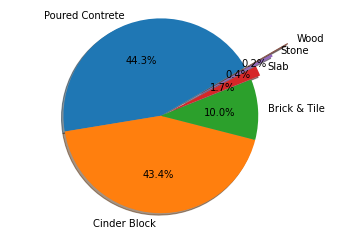

In [22]:
labels = 'Poured Contrete', 'Cinder Block', 'Brick & Tile', 'Slab', 'Stone', 'Wood'
explode = (0, 0.0, 0.0, 0.1, 0.3, 0.5)

fig1, ax1 = plt.subplots()
ax1.pie(train['Foundation'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

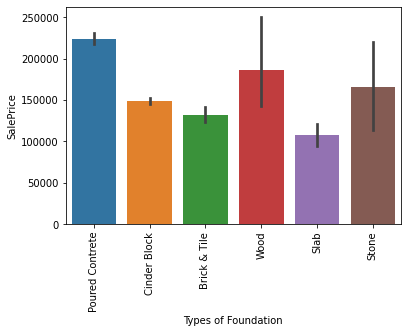

In [23]:
fig = sns.barplot(x = 'Foundation',y = 'SalePrice', data = train)
fig.set_xticklabels(labels=['Poured Contrete', 'Cinder Block', 'Brick & Tile', 'Wood', 'Slab', 'Stone'], rotation=90)
plt.xlabel("Types of Foundation");

Let's plot a distribution plot of YearBuilt column representing the year of a house was bult w.r.t saleprice

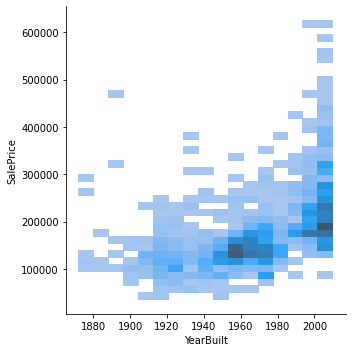

In [24]:
sns.displot(x = 'YearBuilt', y = 'SalePrice', data = train);

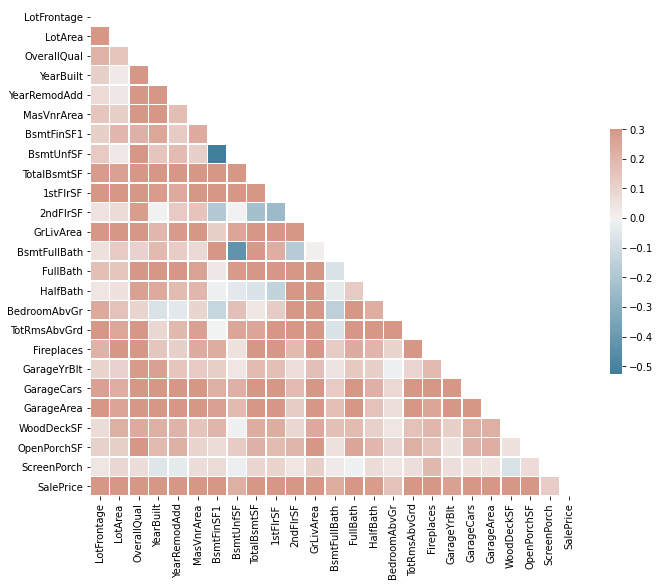

In [25]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

***Modeling***
It's time to create our independent and dependent matrix of feature.**bold text**

In [26]:
x = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

In [27]:
#labelencoding categorical variables from x
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)

In [28]:
x.head()

,LotFrontage,LotArea,Neighborhood,Condition1,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition
0,36,327,5,2,5,6,104,53,1,0,12,13,128,4,2,4,361,6,73,179,1,4,134,230,531,1,2,1,3,6,6,0,90,2,220,5,5,2,0,49,0,4
1,52,498,24,1,2,5,77,26,1,0,8,8,0,4,1,4,482,6,167,441,1,4,427,0,259,0,2,0,3,4,6,1,63,2,149,5,5,2,187,0,0,4
2,39,702,5,2,5,6,102,52,1,0,12,13,104,4,2,4,222,6,278,214,1,4,178,237,570,1,2,1,3,4,6,1,88,2,260,5,5,2,0,30,0,4
3,31,489,6,2,5,6,19,20,1,0,13,15,0,4,0,1,66,6,346,117,1,4,208,178,536,1,1,0,3,5,6,1,85,3,284,5,5,2,0,24,0,0
4,56,925,15,2,5,7,101,50,1,0,12,13,221,4,2,4,328,6,318,370,1,4,347,317,732,1,2,1,4,7,6,1,87,3,378,5,5,2,118,70,0,4


In [29]:
x.shape

(1453, 42)

In [30]:
y.tail()

1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [31]:
x.shape, y.shape

((1453, 42), (1453,))

In [32]:
#splitting the dataset into train and test set.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 31)

In [33]:
len(x_train), len(x_test), len(y_train), len(y_test)

(1089, 364, 1089, 364)

In [34]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [35]:
#model evaluation function
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mae

Lasso

In [36]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1, random_state = 32).fit(x_train, y_train)
cv_r2 = cross_val_score(lasso_reg, x_train, y_train, cv = 10)
y_preds = lasso_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8278706401045719
R^2 score: 0.8563418920151011
Mean Absolute Erro: 19920.254536806577


Ridge

In [37]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5).fit(x_train, y_train)
cv_r2 = cross_val_score(ridge_reg, x_train, y_train, cv = 10)
y_preds = ridge_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8279207755115886
R^2 score: 0.8563675882488649
Mean Absolute Erro: 19915.71950193995


Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000).fit(x_train, y_train)
cv_r2 = cross_val_score(rf_reg, x_train, y_train, cv = 10)
y_preds = rf_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8682129260077265
R^2 score: 0.8957631702672039
Mean Absolute Erro: 15853.1284478022


GradientBoosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=31).fit(x_train, y_train)
cv_r2 = cross_val_score(gbr_reg, x_train, y_train, cv = 10)
y_preds = gbr_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8583668798091466
R^2 score: 0.8697009470457316
Mean Absolute Erro: 18272.807911483636


xgboost

In [40]:
import xgboost as XGB
xgb = XGB.XGBRegressor(learning_rate=0.01, n_estimators=1000, objective='reg:squarederror', random_state = 31).fit(x_train, y_train)
cv_r2 = cross_val_score(xgb, x_train, y_train, cv = 10)
y_preds = xgb.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8978462829804907
R^2 score: 0.9021042214864751
Mean Absolute Erro: 15565.878434065935


Preparing test set

In [41]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Less drop less important featues and columns with null values > 500

In [42]:
null_values = test.loc[:, test.isnull().sum()>500]
test.drop(null_values, axis=1, inplace = True)

test.drop(less_important, axis = 1, inplace = True)

In [43]:
#checking for null values in test set
pd.DataFrame(test.isna().sum())

,0
LotFrontage,227
LotArea,0
Neighborhood,0
Condition1,0
HouseStyle,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0
RoofStyle,0
RoofMatl,0


In [44]:
# taking care of null values
test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace = True)
test['MasVnrArea'].fillna(0 , inplace = True)
test['BsmtCond'].fillna('NA' , inplace = True)
test['BsmtFinType2'].fillna('NA' , inplace = True)
test['Electrical'].fillna('SBrkr' , inplace = True)
test['GarageYrBlt'].fillna(0 , inplace = True)
test['GarageQual'].fillna('NA' , inplace = True)
test['GarageCond'].fillna('NA' , inplace = True)
test['Exterior1st'].fillna('VinylSd' , inplace = True)
test['Exterior2nd'].fillna('VinylSd' , inplace = True)
test['BsmtFinSF1'].fillna(0 , inplace = True)
test['BsmtUnfSF'].fillna(0 , inplace = True)
test['TotalBsmtSF'].fillna(0 , inplace = True)
test['BsmtFullBath'].fillna(0 , inplace = True)
test['Functional'].fillna('Typ' , inplace = True)
test['GarageCars'].fillna(0 , inplace = True)
test['GarageArea'].fillna(0, inplace = True)

In [45]:
#labelencoding test data
test = test.apply(LabelEncoder().fit_transform)

In [46]:
#scaling test data
test = scale.transform(test)

In [47]:
#making prediction
predictions = xgb.predict(test)

Creating submission file

In [48]:
sample_sub = pd.read_csv("/content/sample_data/sample_submission.csv")
final_data = {'Id': sample_sub.Id, 'SalePrice': predictions}
final_submission = pd.DataFrame(data=final_data)
final_submission.to_csv('submission_file.csv',index =False)

In [50]:
final_submission.head()

,Id,SalePrice
0,1461,123509.039062
1,1462,152022.078125
2,1463,180483.312500
3,1464,182821.781250
4,1465,196946.062500
